# _Importing Necessary Libraries_

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# _Reading Image and Converting into required format_

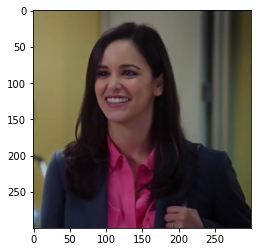

In [35]:
img = cv2.imread("Input Image\Amy.jpg")
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(imgRGB)

## _Identifying Edges_

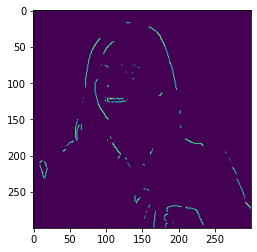

In [36]:
edges = cv2.Canny(imgRGB, 300, 300)
plt.imshow(edges)


## _Applying median blur to obtain edges of even density and continuity_

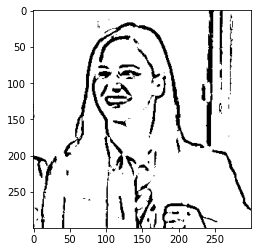

In [37]:
gray = cv2.cvtColor(imgRGB, cv2.COLOR_BGR2GRAY)
gray1 = cv2.medianBlur(gray, 5)
edges = cv2.adaptiveThreshold(gray1, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 5)
plt.imshow(edges, cmap='gray')


# _Magic Function - Color Quantization_

In [38]:
def color_quantization(img, k):
    data = np.float32(img).reshape((-1, 3))
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1.0)
    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    result = center[label.flatten()]
    result = result.reshape(img.shape)
    return result

## _Quantized Image with discrete color patterns_

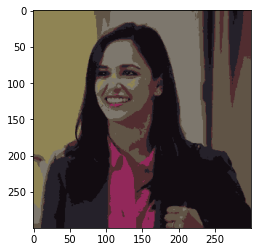

In [39]:
img_1 = color_quantization(imgRGB, 7)
plt.imshow(img_1)

## _Smoothening sharp region tranistion_

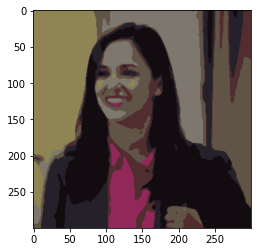

In [41]:
blurred = cv2.medianBlur(img_1, 5)
plt.imshow(blurred)

## _Finally, Adding the Edges to complete the cartoonification_

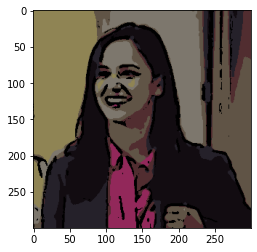

In [42]:
cartoon = cv2.bitwise_and(blurred, blurred, mask=edges)
plt.imshow(cartoon)

### Another interesting approach to displaying images
-> cv2.imshow("Preview", img)<br>
-> It creates a new window for every image displayed<br>
-> Perks: Easier to save images<br>
-> Limitation: Only 1 window at a time can be processed<br>